# Decision Tree Classification - CART without using sklearn

### Importing Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data Set

In [49]:
df = pd.read_csv('C:/Users/Adnin/Downloads/data.csv')

In [50]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130.0,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130.0,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120.0,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120.0,354,0,1,163,1,0.6,2,0,2,1


In [51]:
df.shape

(303, 14)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  298 non-null    float64
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 33.3+ KB


In [53]:
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.651007,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.320132,0.544554
std,9.082101,1.032052,17.683878,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.592299,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [54]:
df.describe(include=['object'])

,sex
count,303
unique,2
top,male
freq,207


In [55]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          3
target        2
dtype: int64

### Checking missing values

In [56]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    5
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

C:\Users\Adnin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


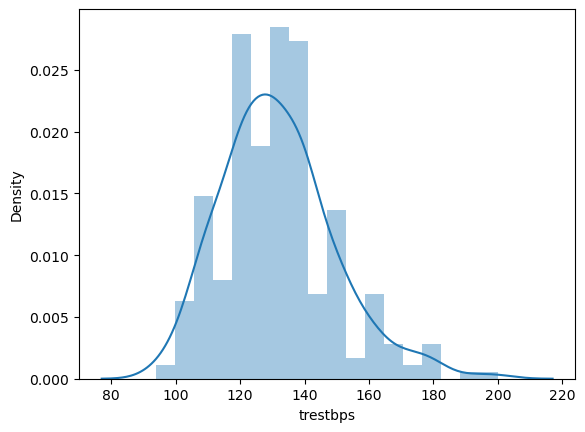

In [57]:
sns.distplot(df['trestbps'])
plt.show()

In [58]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())

In [59]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Converting Categorical column into numerical

In [60]:
df.replace({'sex':{'male':1,'female':0}}, inplace=True)

In [61]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130.0,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130.0,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120.0,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120.0,354,0,1,163,1,0.6,2,0,2,1


### Correlation

In [62]:
corr = df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.277935,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.067997,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056382,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.212731,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047963,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.166833,0.433798
trestbps,0.277935,-0.056382,0.047963,1.000000,0.123067,0.177769,-0.115083,-0.044949,0.066537,0.191996,-0.120976,0.101199,0.061160,-0.143518
chol,0.213678,-0.197912,-0.076904,0.123067,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.094312,-0.085239
fbs,0.121308,0.045032,0.094444,0.177769,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.022066,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.115083,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.012982,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.044949,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.106598,0.421741
exang,0.096801,0.141664,-0.394280,0.066537,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.217851,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.191996,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.212139,-0.430696


<AxesSubplot:>

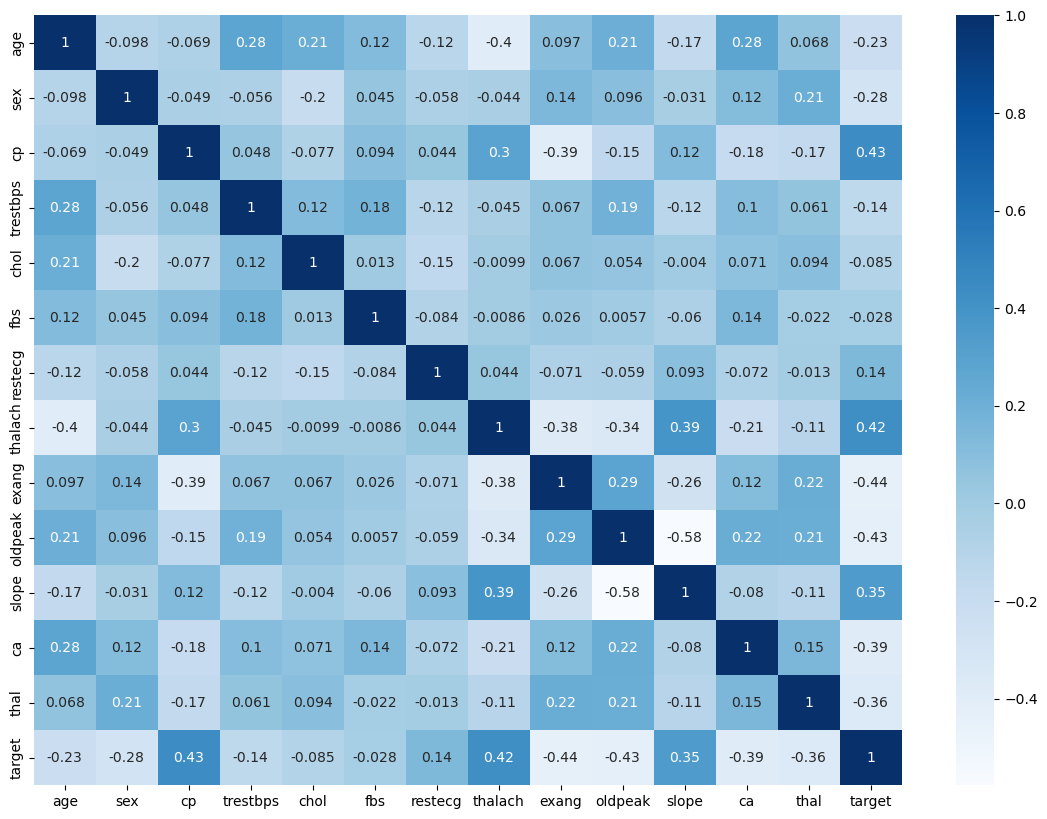

In [63]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

# Data Visualization

### checking how many people have heart disease or not

In [64]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

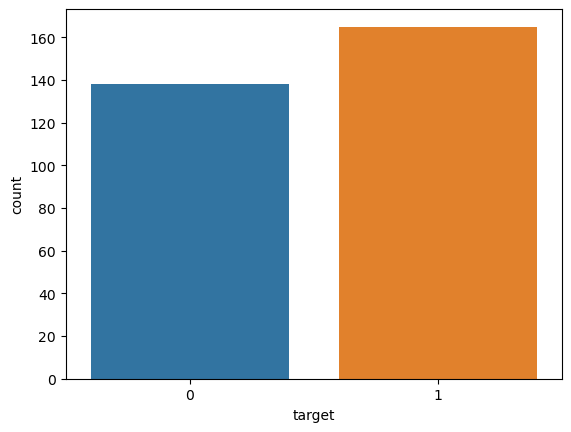

In [65]:
sns.countplot(x='target',data= df)

##### Observation:- 
more than 160 people found to have heart disease.

### checking how many males and females have heart disease

In [66]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

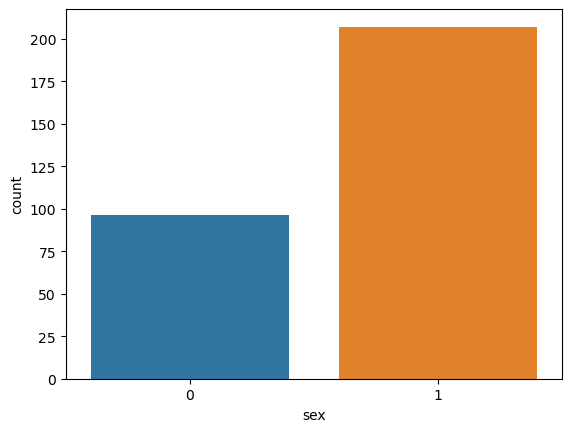

In [67]:
sns.countplot(x='sex',data= df)

##### Observation :-
males were more effected by heart disease than females

C:\Users\Adnin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

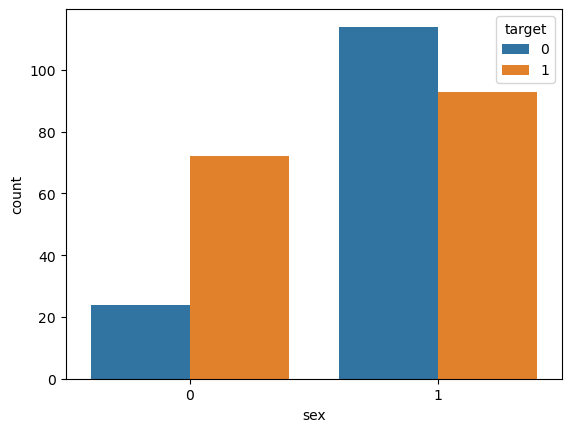

In [68]:
sns.countplot('sex', hue='target', data=df)

<AxesSubplot:xlabel='age', ylabel='count'>

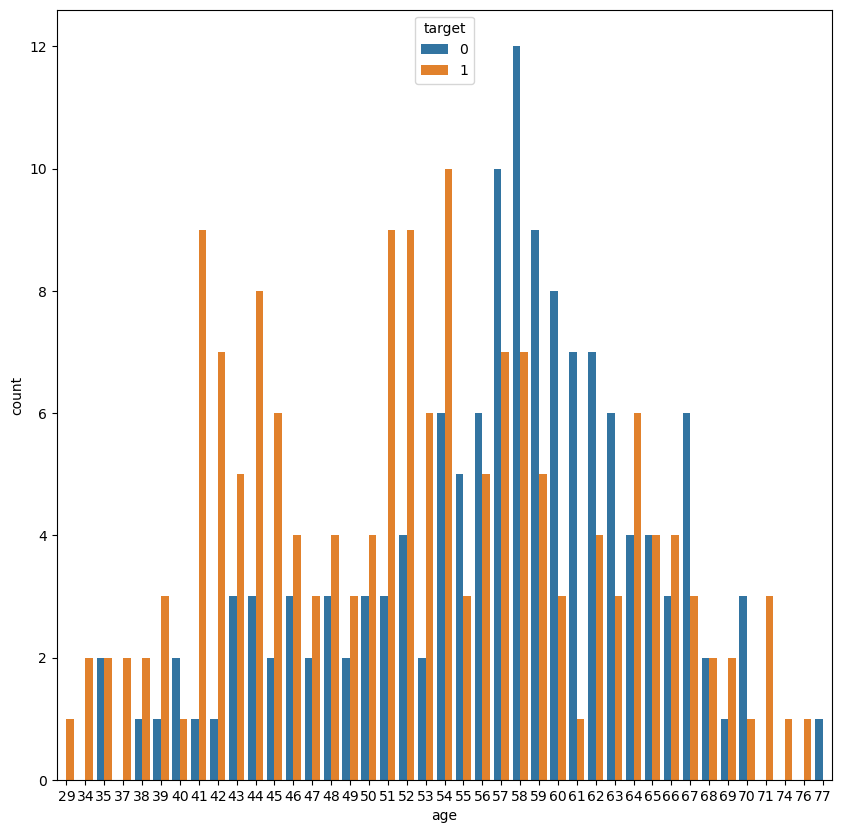

In [69]:
plt.figure(figsize = (10,10))
sns.countplot(x='age',data=df,hue='target')

##### Observation :-
even young people found to have heart disease and middle age were more affected by it.

C:\Users\Adnin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='count'>

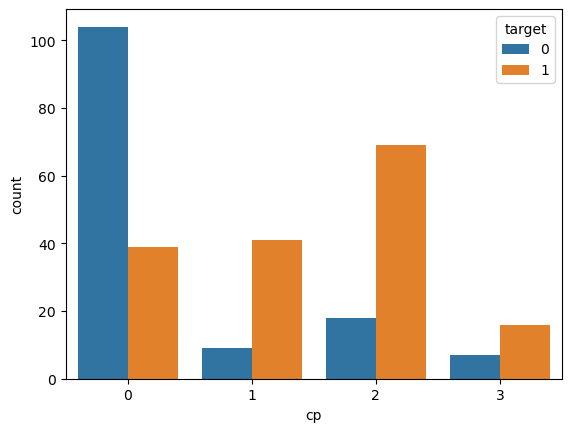

In [70]:
sns.countplot('cp',hue='target',data=df)

##### Observation :-
the persons having Non-anginal chest pain are more likely to have heart disease

<AxesSubplot:xlabel='target', ylabel='trestbps'>

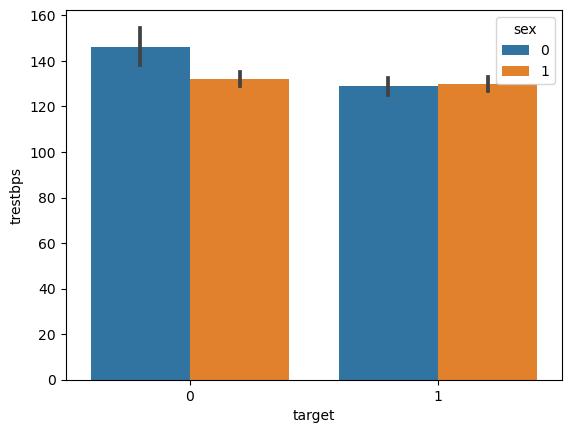

In [71]:
sns.barplot(x="target",y="trestbps",data=df,hue='sex')

##### Observation :- 
gender is not impacting on heart patients whose bp is around 120-140 so bp is seems neutral for both and males

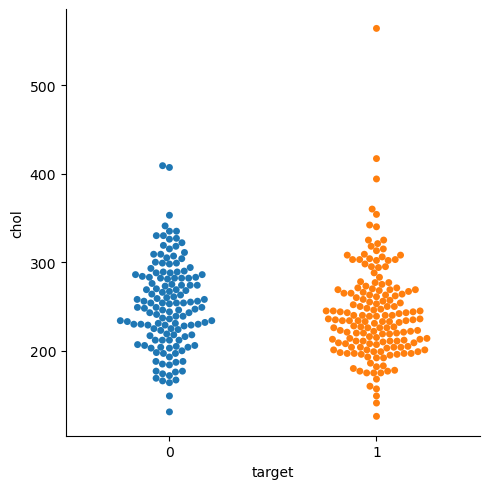

In [72]:
sns.catplot(x="target",y="chol",data=df,kind="swarm")

##### Observation :- 
the persons having cholestrol around 200-300 are more likely to have heart disease

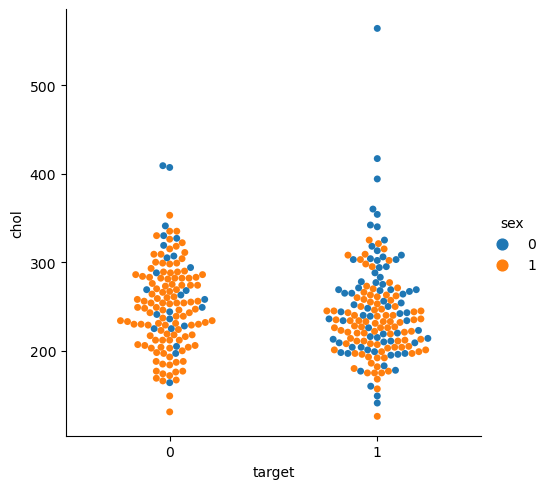

In [73]:
sns.catplot(x="target",y="chol",data=df,hue="sex",kind="swarm")

##### Observation :-
mostly females are more likely to have heart disease whose cholestrol level is around 200-300

<AxesSubplot:xlabel='fbs', ylabel='count'>

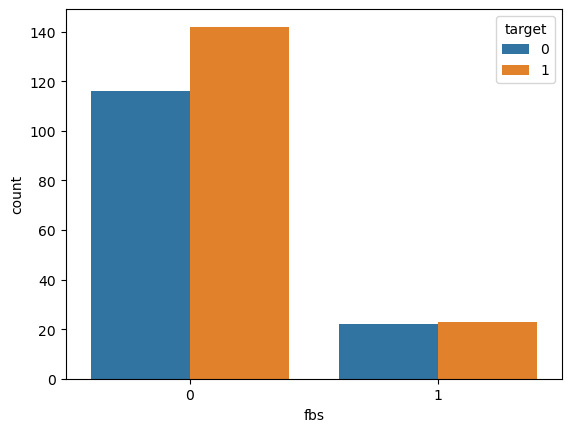

In [74]:
sns.countplot(x="fbs",data=df,hue='target')

##### Observation :
sugar is not affected

<AxesSubplot:xlabel='restecg', ylabel='count'>

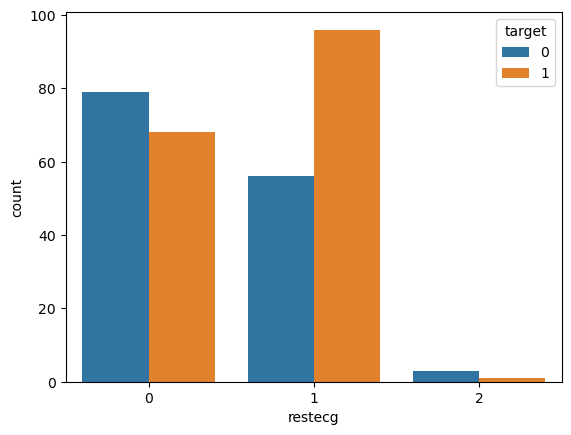

In [75]:
sns.countplot(x="restecg",data=df,hue='target')

##### Observation :- 
persons having ST-T wave abnormality resting ecg are more likely to have heart disease

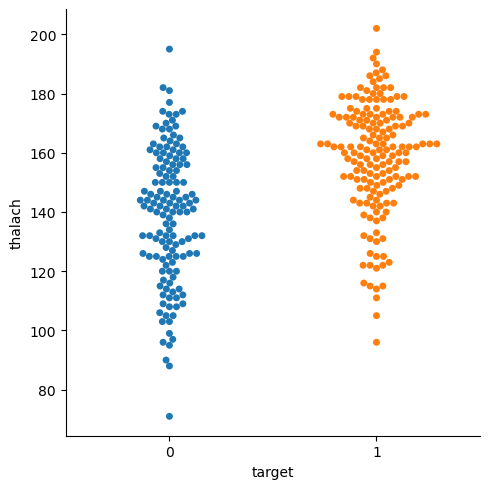

In [76]:
sns.catplot(x="target",y="thalach",data=df,kind="swarm")

##### Observation :-
the persons having heart rate greater than 140 are more likely to have heart disease

<AxesSubplot:xlabel='exang', ylabel='count'>

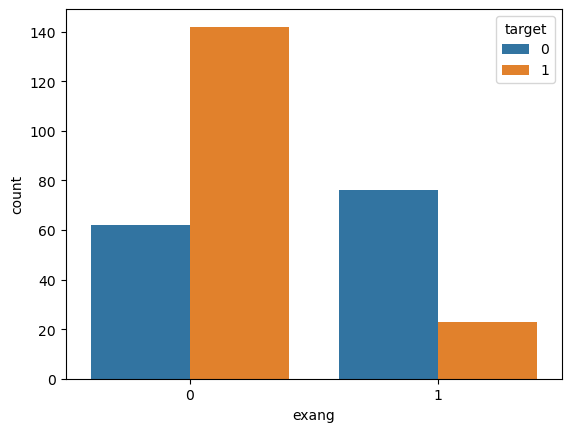

In [77]:
sns.countplot(x="exang",data=df,hue='target')

##### Observation :- 
the persons having exercise induced angina are less likely to have heart disease

<AxesSubplot:xlabel='target', ylabel='oldpeak'>

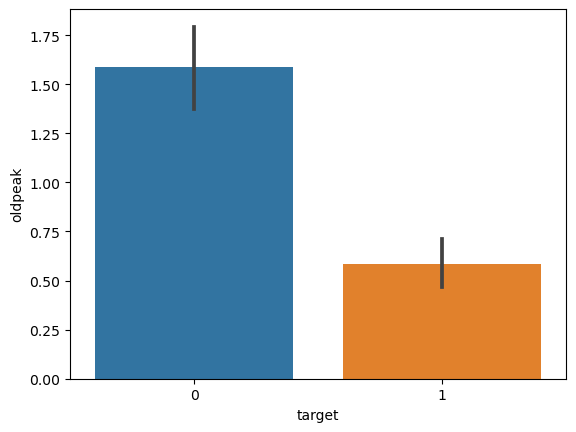

In [78]:
sns.barplot(x="target",y='oldpeak',data=df)

##### Observation :-
the persons having heart disease are likely to have old peak value is 0.6

<AxesSubplot:xlabel='thal', ylabel='count'>

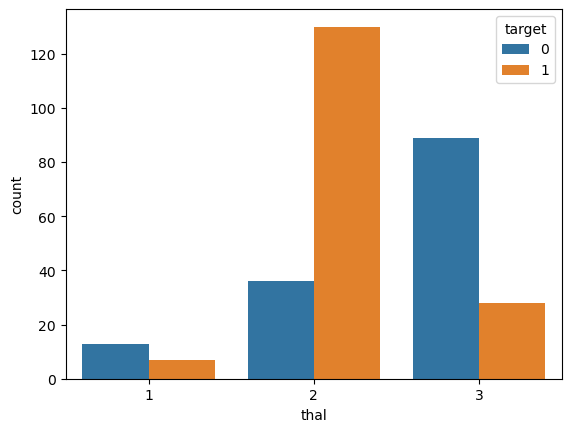

In [79]:
sns.countplot(x="thal",data=df,hue="target")

##### Observation :-
fixed defect type thal are more effected by heart disease

# Declare feature vector and target variable

In [80]:
X = df.drop('target',axis=1)
y = df['target']
X = np.array(X)
y = np.array(y)

# Split data into separate training and test set

In [81]:
def train_test_split(X, y, test_size=0.2, random_state=42):
    if random_state:
        np.random.seed(random_state)
    shuffle_indices = np.random.permutation(len(X))
    test_size = int(test_size * len(X))
    test_indices = shuffle_indices[:test_size]
    train_indices = shuffle_indices[test_size:]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, X_test, y_train, y_test


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision tree using cart algorithm

In [83]:
class DecisionTreeNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

In [84]:
class DecisionTreeClassifier:
    def __init__(self, max_depth=3, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape

        if n_samples < self.min_samples_split or depth == self.max_depth:
            return self._leaf_value(y)

        best_feature_index, best_threshold = self._best_split(X, y)

        if best_feature_index is None:
            return self._leaf_value(y)

        left_idxs = X[:, best_feature_index] <= best_threshold
        right_idxs = X[:, best_feature_index] > best_threshold

        left_tree = self._build_tree(X[left_idxs], y[left_idxs], depth + 1)
        right_tree = self._build_tree(X[right_idxs], y[right_idxs], depth + 1)

        return DecisionTreeNode(best_feature_index, best_threshold, left_tree, right_tree)

    def _best_split(self, X, y):
        best_gini = np.inf
        best_feature_index = None
        best_threshold = None

        for feature_index in range(X.shape[1]):
            feature = X[:, feature_index]
            thresholds = np.unique(feature)

            for threshold in thresholds:
                left_idxs = feature <= threshold
                right_idxs = feature > threshold

                if len(y[left_idxs]) == 0 or len(y[right_idxs]) == 0:
                    continue

                gini = self._split_gini(y, y[left_idxs], y[right_idxs])

                if gini < best_gini:
                    best_gini = gini
                    best_feature_index = feature_index
                    best_threshold = threshold

        return best_feature_index, best_threshold

    def _split_gini(self, parent, left, right):
        left_weight = len(left) / len(parent)
        right_weight = len(right) / len(parent)
        return left_weight * self._gini(left) + right_weight * self._gini(right)

    def _gini(self, y):
        classes = np.unique(y)
        n_samples = len(y)
        gini = 0

        for c in classes:
            p = len(y[y == c]) / n_samples
            gini += p * (1 - p)

        return gini

    def _leaf_value(self, y):
        value = np.bincount(y).argmax()
        return DecisionTreeNode(value=value)

    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        for i, x in enumerate(X):
            node = self.tree
            while node.left:
                if x[node.feature_index] <= node.threshold:
                    node = node.left
                else:
                    node = node.right
                    
            predictions[i] = node.value
        return predictions


In [85]:
def accuracy_score(y_true, y_pred):
    n_correct = sum(y_true[i] == y_pred[i] for i in range(len(y_true)))
    n_total = len(y_true)
    return n_correct / n_total

In [86]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#train model

y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train accuracy: {accuracy_train:.2f}")

# test model

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Test accuracy: {accuracy:.2f}")

Train accuracy: 0.84
Test accuracy: 0.88


# Hyperparameter

In [89]:
# Define hyperparameter ranges
max_depths = [1,2,3,4,5,6,7,8,9,10]
min_samples_splits = [1,2,3,4,5,6,7,8,9,10]

# Split data into training and validation sets
val_size = 0.2
split_idx = int(len(X) * (1 - val_size))
X_train, y_train = X[:split_idx], y[:split_idx]
X_val, y_val = X[split_idx:], y[split_idx:]

# Initialize variables to store best hyperparameters and best validation score
best_params = None
best_score = -np.inf

# Loop over all possible combinations of hyperparameters
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        # Fit decision tree model on training data using current hyperparameters
        tree = DecisionTreeClassifier(max_depth, min_samples_split)
        tree.fit(X_train, y_train)
                
        # Evaluate model on validation set
        y_pred = tree.predict(X_val)
        score = accuracy_score(y_val, y_pred)
                
        # Record best hyperparameters and best validation score
        if score > best_score:
            best_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split}
            best_score = score

# Fit decision tree model on entire dataset using best hyperparameters
best_tree = DecisionTreeClassifier(**best_params)
best_tree.fit(X, y)

# Evaluate model on separate test set
y_pred_train = best_tree.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
print(f'Train set accuracy: {train_score}')

y_pred_test = best_tree.predict(X_test)
test_score = accuracy_score(y_test, y_pred_test)
print(f'Test set accuracy: {test_score}')

print("Best max_depth: ", best_params['max_depth'])
print("Best min_samples_split: ", best_params['min_samples_split'])


Train set accuracy: 0.9504132231404959
Test set accuracy: 0.9666666666666667
Best max_depth:  7
Best min_samples_split:  6


# Evaluation Metrics

In [91]:
# Calculate TP, FP, FN, TN
TP = np.sum((y_test == 1) & (y_pred_test == 1))
FP = np.sum((y_test == 0) & (y_pred_test == 1))
FN = np.sum((y_test == 1) & (y_pred_test == 0))
TN = np.sum((y_test == 0) & (y_pred_test == 0))

# Create confusion matrix
confusion_matrix = np.array([[TP, FP], [FN, TN]])
print(confusion_matrix)

# Calculate accuracy, recall, precision, and F-score
accuracy= (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
fscore = 2 * (precision * recall) / (precision + recall)

print("Accuracy:",accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F-score:", fscore)

[[30  0]
 [ 2 28]]
Accuracy: 0.9666666666666667
Recall: 0.9375
Precision: 1.0
F-score: 0.967741935483871
